**Cargar las librerías a utilizar**

In [1]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

2023-02-13 22:01:15.967793: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


**Cargar los datos y separarlos en datos de entrenamiento y prueba**

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [3]:
train_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
train_data.shape

(60000, 28, 28)

In [5]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

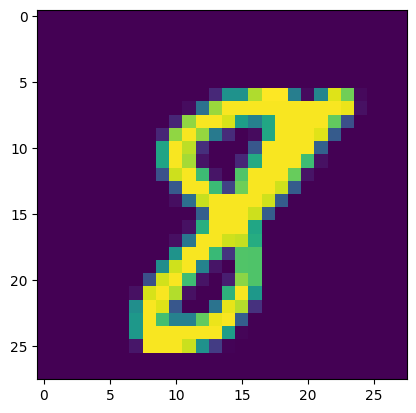

In [6]:
plt.imshow(train_data[55])

In [7]:
train_labels[55]

8

**Cargar y configurar el modelo de la red neuronal**

In [8]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

2023-02-13 22:01:18.461910: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (34)
2023-02-13 22:01:18.461951: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-3e9166e2-9a18-40ab-be66-fe6b0049b378): /proc/driver/nvidia/version does not exist
2023-02-13 22:01:18.462213: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Compilar el modelo de la red neuronal**

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Realizar una limpieza a los datos para un mejor procesamiento**

In [11]:
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [12]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [13]:
train_labels[0]

5

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Entrenando la red neuronal**

In [15]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2554 - accuracy: 0.9254
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1046 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0697 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0503 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0383 - accuracy: 0.9885


**Evaluando a la red**

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0640 - accuracy: 0.9800


[0.06403666734695435, 0.9800000190734863]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3e9166e2-9a18-40ab-be66-fe6b0049b378' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>